In [56]:
import numpy as np # algèbre linéaire
import pandas as pd # procès de données, CSV file I/O (e.g. pd.read_csv)
# import de NLK
import nltk

# victorisation
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt 


In [57]:
datak = pd.read_csv('Emotion_final.csv')

In [58]:
# Préparation des données
# preparation des targets
corpus = np.array(datak["Text"])
targets = np.array(datak["Emotion"])

Est-que les clusters obtenue avec kmeans reflete les groupements de texte par émotions ?

In [59]:
#la liste des émotions
listEmotion = datak["Emotion"].unique()
listEmotion

# encodage des données
# remplacer ['sadness' 'anger' 'love' 'surprise' 'fear' 'happy'] par 1, 2,3, 4, 5

datak["Emotion"] = datak["Emotion"].astype('category').cat.codes 



### Utilisation de countVectorizer 

In [60]:
stop_words = nltk.corpus.stopwords.words("english")

# Vobabulary analysis
cv = CountVectorizer(stop_words = stop_words)
X = cv.fit_transform(corpus)

In [61]:
#calculer le nombre de cluster optimal
internia = []
k_rang = range(1,10)
for k in k_rang:
    model = KMeans(n_clusters=k).fit(X)
    internia.append(model.inertia_)

Text(0, 0.5, 'Coût de model Incertia')

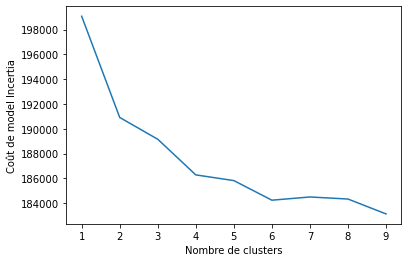

In [62]:
plt.plot(k_rang,internia)
plt.xlabel("Nombre de clusters")
plt.ylabel("Coût de model Incertia")

### Nombre de clusters , le coude selon le graphe est 6



In [63]:
#Silhouette Metric
from sklearn import metrics
silouette = metrics.silhouette_score(X, model.labels_)

In [64]:
round(silouette,3)


0.041

In [65]:
# Chargement du 2eme data  qui seront utilisées.
dataw = pd.read_csv('text_emotion.csv')


In [67]:

# encodage des données
# remplacer ['sadness' 'anger' 'love' 'surprise' 'fear' 'happy'..] par 1, 2,3, 4, 5

dataw["sentiment"] = dataw["sentiment"].astype('category').cat.codes 

# Préparation des données
# preparation des targets
corpus2 = np.array(dataw["content"])
targets2 = np.array(dataw["sentiment"])


In [68]:
# Vobabulary analysis
cv = CountVectorizer(stop_words = stop_words)
X2 = cv.fit_transform(corpus)

In [73]:
#calculer le nombre de cluster optimal
internia2 = []
k_rang = range(1,20)
for k in k_rang:
    model = KMeans(n_clusters=k).fit(X2)
    internia2.append(model.inertia_)

Text(0, 0.5, 'Coût de model Incertia')

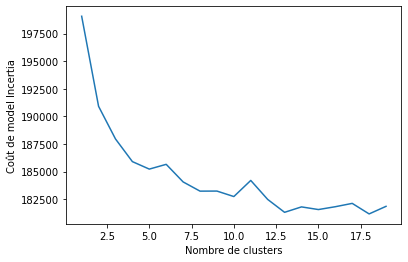

In [74]:
plt.plot(k_rang,internia2)
plt.xlabel("Nombre de clusters")
plt.ylabel("Coût de model Inertia")

Il s'avère difficle de déterminer le nombre de clusters à partir du graphe pour le 2eme Data set